**Table of contents**

>[Description](#scrollTo=Z_op6mek7QtG)

>[Import Libraries](#scrollTo=yiqSdNMWz8sr)

>[Discrete Distributions](#scrollTo=Gt3saqHcGk6I)

>>[Binomial](#scrollTo=8rEn8K7JGrWQ)

>>>[Metrics](#scrollTo=tKjuBG-5A1Rf)

>>[Geometric](#scrollTo=hMN0gcPNdPGZ)

>>>[Metrics](#scrollTo=5i-tBwnb0ijT)

>>[Hypergeometric](#scrollTo=u8vcIAB5Kc2z)

>>>[Metrics](#scrollTo=4P7sk72q5Emx)

>>[Poisson](#scrollTo=p7K6Xu8lhAiS)

>>>[Metrics](#scrollTo=v6IBkncW478h)

>[Continuous Distributions](#scrollTo=iYJKa59IJ0_J)

>>[Uniform](#scrollTo=QJOnzjNIJ64H)

>>>[Metrics](#scrollTo=A_dCnf04NFfG)

>>[Normal](#scrollTo=aCdqv1ZTYrwe)

>>>[The Six Sigma Rule](#scrollTo=4XQfpUbB-TyB)

>>>[Use Cases](#scrollTo=n0QTOjdO-Ytz)

>>[Beta](#scrollTo=KM-EIo9BtQ5W)

>>>[Metrics](#scrollTo=DGlrrRA2N0MB)



# Description

My purpose in creating this notebook is that I wanted to review what I learned about some popular distributions and do some hands-on coding to figure out how to implement those distributions using Python.

For this notebook I used Scipy library.

**NOTE:** Please download notebooks to use the table of contents or see some visualizations, it doesn't work well in GitHub.

# Import Libraries

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

# Discrete Distributions

## Binomial

Generating random numbers

In [ ]:
n = 10
p = 0.5
binom_data = stats.binom.rvs(n, p, size= 10_000)
binom_data[:10]

array([6, 5, 4, 5, 3, 3, 3, 7, 3, 4])

plotting the numbers

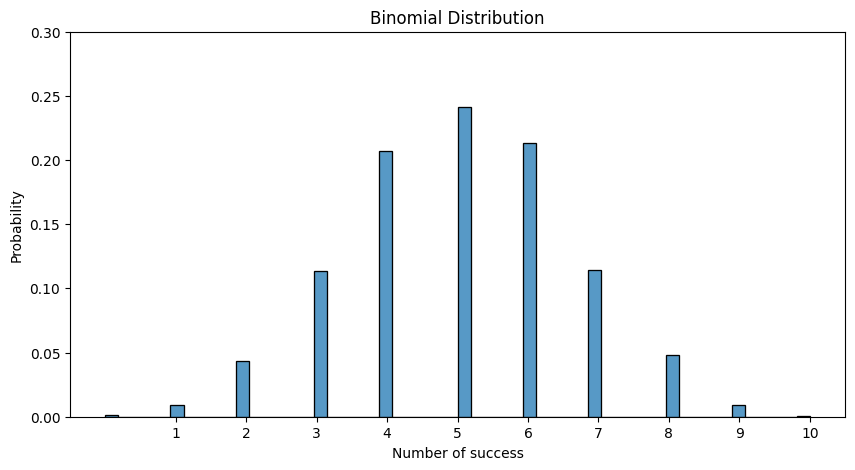

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(binom_data,  stat='probability')
plt.xticks(np.arange(1, 11, step=1))
plt.title('Binomial Distribution')
plt.xlabel('Number of success')
plt.ylabel('Probability')
plt.yticks(np.arange(0, 0.35, step=0.05))
plt.show()

Let's consider p=0.25

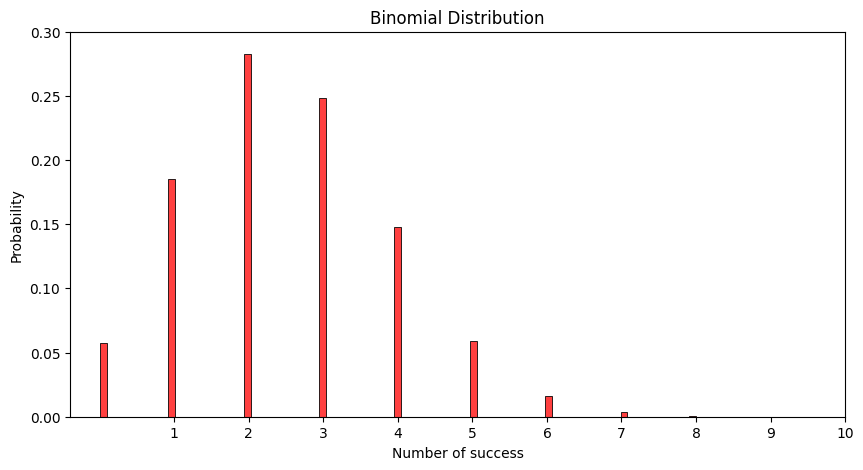

In [ ]:
p = 0.25
binom_data_2 = stats.binom.rvs(n, p, size=10_000)
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(binom_data_2, stat='probability', color='red')
plt.xticks(np.arange(1, 11, step=1))
plt.yticks(np.arange(0, 0.35, step=0.05))
plt.title('Binomial Distribution')
plt.xlabel('Number of success')
plt.ylabel('Probability')
plt.show()

### Metrics

**PMF**

In [ ]:
k = 50
pmf = stats.binom.pmf(k, 100, 0.7)
round(pmf, 5)

1e-05

It means that if we do a trial 100 times with the probability of success = 0.7 for each trial, What is the probability of winning exactly 50 times out of 100? it's equal to 1e-05

**CDF**

In [ ]:
k = 65
cdf = stats.binom.cdf(k, 100, 0.7)
round(cdf, 5)

0.16286

It means that if we do a trial 100 times with the probability of success = 0.7 for each trial, What is the probability of winning at most 65 times(65 or less) out of 100? it's equal to 0.1628

**MEDIAN**

In [ ]:
# Compute median for the above histplot chart with p=0.25
median = stats.binom.median(n=10, p=0.25)
median

2.0

**MEAN**

In [ ]:
# Compute mean for the above histplot chart with p=0.25
mean = stats.binom.mean(n=10, p=0.25)
mean

2.5

**VARIANCE**

In [ ]:
# Compute var for the above histplot chart with p=0.25
var = stats.binom.var(n=10, p=0.25)
var

1.875

## Geometric

Generating random numbers

In [ ]:
geom_data = stats.geom.rvs(p=0.3, size=10_000)
geom_data[:10]

array([1, 1, 4, 1, 1, 6, 3, 1, 3, 2])

plotting the numbers

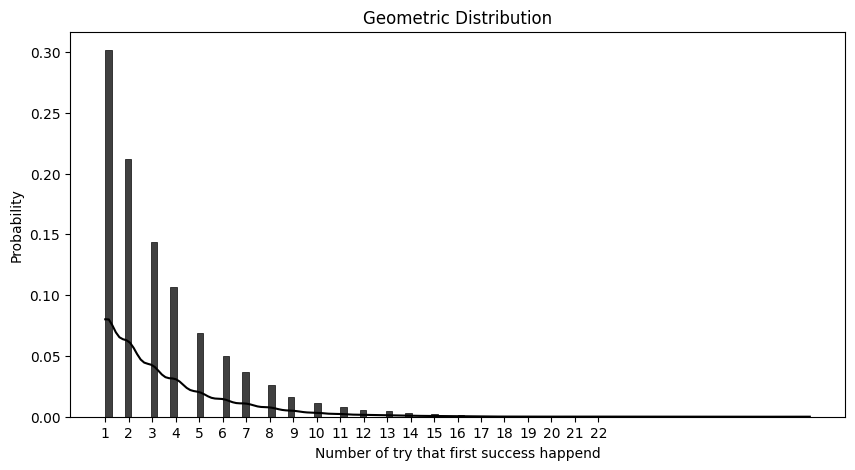

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(geom_data, kde=True ,stat='probability', color='black', alpha=0.75)
plt.xticks(np.arange(1, 23, step=1))
plt.yticks(np.arange(0, 0.35, step=0.05))
plt.title('Geometric Distribution')
plt.xlabel('Number of try that first success happend')
plt.ylabel('Probability')
plt.show()

### Metrics

**PMF**

In [ ]:
pmf = stats.geom.pmf(5, 0.3)
round(pmf, 3)

0.072

It means that, if we had a chance of 30% to see H in each trial for coin toss, the probability of seeing H in the exact 5th trial for the first time would be 0.072.

**CDF**

In [ ]:
cdf = stats.geom.cdf(5, 0.6)
round(cdf, 3)

0.99

It means that, if we had a chance of 60% to see H in each trial for coin toss, the probability of seeing H at most 5th trial(5 or less) for the first time would be 0.99.

**MEDIAN**

In [ ]:
median = stats.geom.median(0.3)
median

2.0

**MEAN**

In [ ]:
mean = stats.geom.mean(0.3)
round(mean, 3)

3.333

**VARIANCE**

In [ ]:
var = stats.geom.var(0.3)
round(var, 3)

7.778

## Hypergeometric

Generating random numbers

In [ ]:
total_number = 1000
blue = 600
red = total_number - blue
number_of_sample = 800

hyper_data = stats.hypergeom.rvs(total_number, blue, number_of_sample, size=10_000)
hyper_data[:10]

array([482, 491, 483, 481, 484, 478, 472, 477, 477, 480])

plotting the numbers

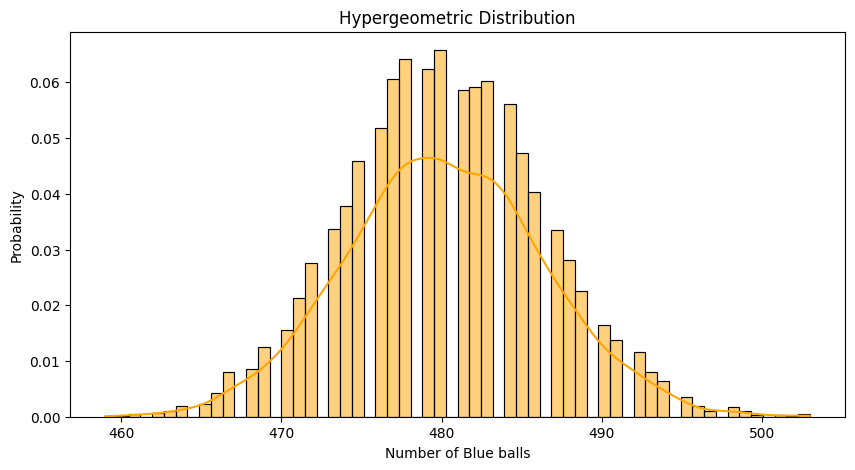

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(hyper_data, kde=True, stat='probability', color='orange')
plt.title("Hypergeometric Distribution")
plt.xlabel("Number of Blue balls")
plt.show()

### Metrics

**PMF**

In [ ]:
pmf = stats.hypergeom.pmf(483, total_number, blue, number_of_sample)
round(pmf, 3)

0.057

It shows that if we have 1000 balls in total containing 600 blue and 400 red, and then we select 800 out of 1000, the probability of being 483 blue balls out of 800 balls(and the rest of them would be red) is equal to 0.057.

**CDF**

In [ ]:
cdf = stats.hypergeom.cdf(483, total_number, blue, number_of_sample)
round(cdf, 3)

0.715

It shows that if we have 1000 balls in total containing 600 blue and 400 red, and then we select 800 out of 1000, the probability of being at most 483 blue balls(483 or less) out of 800 balls is equal to 0.715.

**MEDIAN**

In [ ]:
median = stats.hypergeom.median(total_number, blue, number_of_sample)
round(median, 3)

480.0

**MEAN**

In [ ]:
mean = stats.hypergeom.mean(total_number, blue, number_of_sample)
round(mean, 3)

480.0

**VARIANCE**

In [ ]:
var = stats.hypergeom.var(total_number, blue, number_of_sample)
round(var, 3)

38.438

## Poisson

Generating random numbers

In [ ]:
mu = 35
poisson_data = stats.poisson.rvs(mu, size=10_000)
poisson_data[:10]

array([35, 35, 33, 41, 25, 35, 43, 31, 38, 31])

plotting the numbers

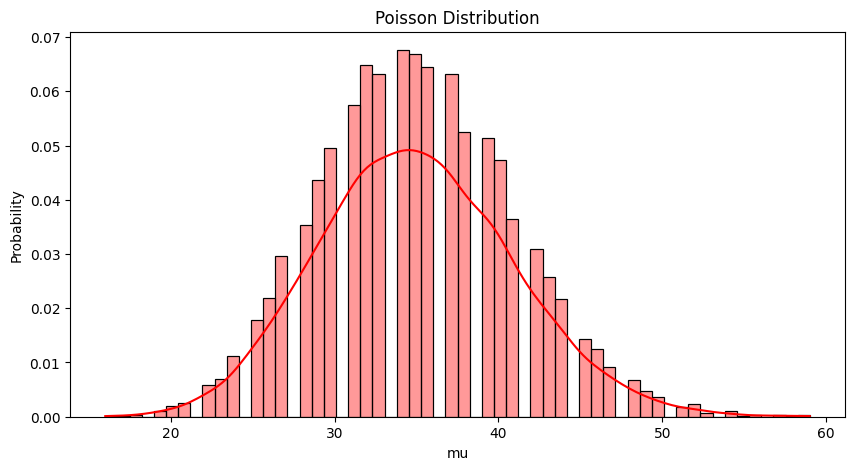

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(poisson_data, stat='probability', kde=True, color='red', alpha=0.4)
plt.xlabel('mu')
plt.title("Poisson Distribution")
plt.show()

### Metrics

**PMF**

In [ ]:
pmf = stats.poisson.pmf(45, mu)
round(pmf, 3)

0.016

It shows that if an event occurs 35 times in average in a specific period(like every 60sec), the probability of occuring 45 times on average in that period is equal to 0.016.

**CDF**

In [ ]:
cdf = stats.poisson.cdf(45, mu)
round(cdf, 3)

0.958

It shows that if an event occurs 35 times in average in a specific period(like every 60sec), the probability of occuring at most 45 times(45 times or less) on average in that period is equal to 0.958.

**MIDEAN**

In [ ]:
median = stats.poisson.median(35)
median

35.0

**MEAN**

In [ ]:
mean = stats.poisson.mean(35)
mean

35.0

**VARIANCE**

In [ ]:
var = stats.poisson.var(mu)
var

35.0

# Continuous Distributions

## Uniform

Generating random numbers

In [ ]:
a = 0
b = 20
uniform_data = stats.uniform.rvs(loc=a, scale = b, size=10_000)
uniform_data[0:10]

array([17.41981452, 18.20850991,  7.88703035,  8.20799974, 14.85400514,
       15.50335901,  5.9255337 , 14.91990163,  9.26616922, 14.98102236])

plotting the numbers

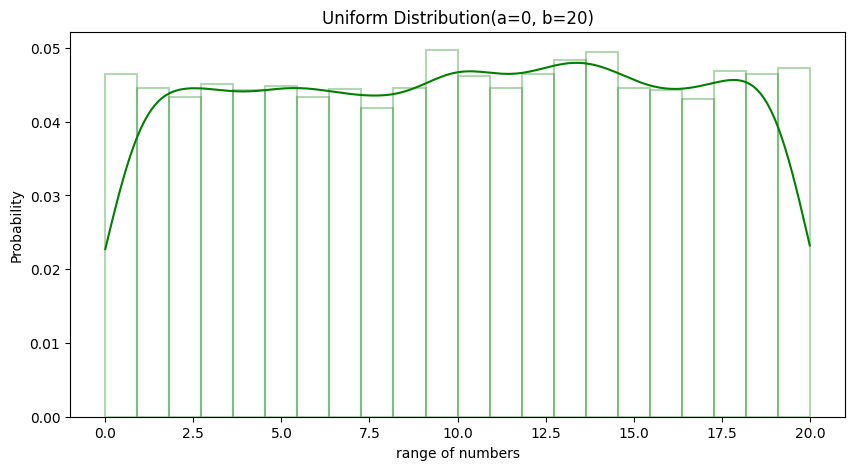

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(uniform_data, kde=True, color='green', stat='probability', alpha=0.3, fill=False)
plt.title('Uniform Distribution(a=0, b=20)')
plt.xlabel('range of numbers')
plt.show()

Cumulative distribution

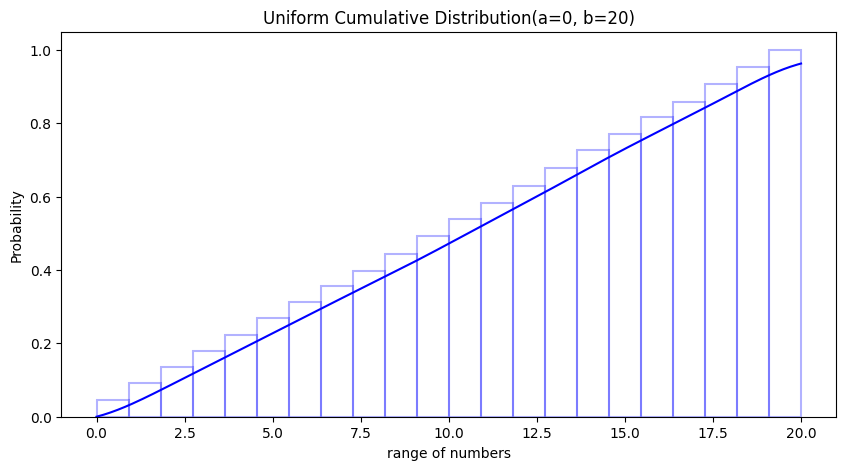

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(uniform_data, kde=True, color='blue', stat='probability', cumulative=True, alpha=0.3 , fill=False)
plt.title('Uniform Cumulative Distribution(a=0, b=20)')
plt.xlabel('range of numbers')
plt.show()

### Metrics

**PDF(PEAK)**

In [ ]:
# The peak of the plot should be: 1/(b - a)
# In the plot we can see that the peak is 0.05
x = 15.46
print(f'Peak from formula(ideal) is: {1/(b-a)}, and from our data is: {stats.uniform.pdf(x, a, b)}')

Peak from formula(ideal) is: 0.05, and from our data is: 0.05


**CDF**

In [ ]:
# The CDF for any x  shoulf be: (x-a)/(b-a)
print(f'CDF from formula(ideal) is: {(x-a)/(b-a)}, and from our data is: {stats.uniform.cdf(x, a, b)}')

CDF from formula(ideal) is: 0.773, and from our data is: 0.773


**Mean**

In [ ]:
# The mean should be: (a + b)/ 2
print(f'Mean from formula(ideal) is: {(a+b)/ 2}, and from our data is: {round(statistics.mean(uniform_data), 2)}')

Mean from formula(ideal) is: 10.0, and from our data is: 10.08


**Median**

In [ ]:
print(f'Median from formula(ideal) is: {stats.uniform.median(a, b)}, and from our data is: {round(statistics.median(uniform_data), 3)}')

Median from formula(ideal) is: 10.0, and from our data is: 10.193


**Variance**

In [ ]:
## The variance from the formula should be: (b-a)^2 / 12
print(f'Variance from formula(ideal) is: {round((b-a)**2 / 12, 2)}, and from our data is: {round(statistics.variance(uniform_data), 2)}')

Variance from formula(ideal) is: 33.33, and from our data is: 33.31


## Normal

In [ ]:
mean = 0
std = 1
normal_data = stats.norm.rvs(loc=mean, scale=std, size=10_000)
normal_data[0:10]

array([ 0.69722413, -1.69048446, -0.14508582,  0.68482878, -0.86429418,
       -1.20648683, -1.27471464, -0.23714834, -0.44183025, -0.00783668])

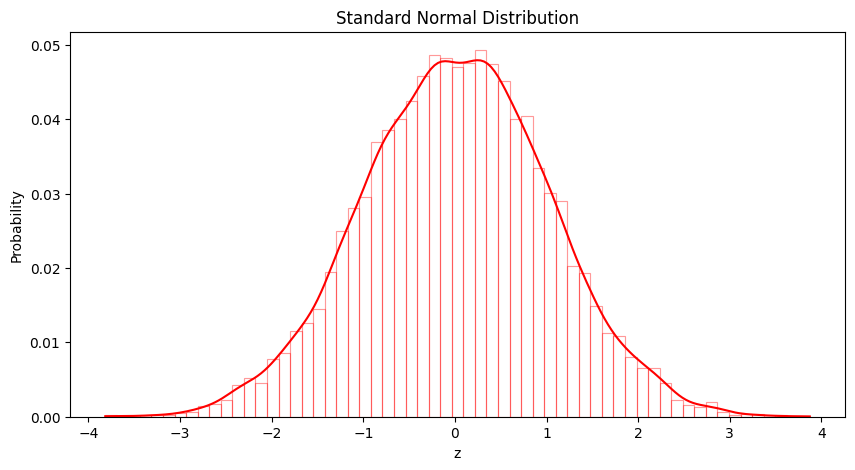

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(normal_data, kde=True, color='red', alpha=0.4, stat='probability', fill=False)
plt.title('Standard Normal Distribution')
plt.xlabel('z')
plt.show()

### The Six Sigma Rule

Let's say we want to compute CDF(-1, 1). first of all, we can compute CDF(1) which is cumulative from the beginning to CDF(z=1). and then comput CDF(-1) which is equal to (1 - CDF(1)).

The result is CDF(-1, 1) = CDF(1) - CDF(-1):

In [ ]:
res = stats.norm.cdf(1, 0, 1) - (1 - stats.norm.cdf(1, 0, 1))
round(res, 3)

0.683

1) It means that almost 68% of the data in a dataset with a standard normal distribution (with mean=0 and var=1), is laid between -1 and +1(the actual value is (-sigma, +sigma)).

sigma = std

Lets check this number for (-2*sigma, 2*sigma)

In [ ]:
res = stats.norm.cdf(2, 0, 1) - (1 - stats.norm.cdf(2, 0, 1))
round(res, 3)

0.954

2) It means that almost 95% of the data in a dataset with a standard normal distribution (with mean=0 and var=1), is laid between -2 and 2.

And Finally for (-3sigma, +3sigma)

In [ ]:
res = stats.norm.cdf(3, 0, 1) - (1 - stats.norm.cdf(3, 0, 1))
round(res, 3)

0.997

3) We can see that almost 99.7% of the data in a dataset with a standard normal distribution (with mean=0 and var=1), is laid between -3 and 3.

**The result of 1, 2, and 3 is called six sigma rule**

Cumulative distribution

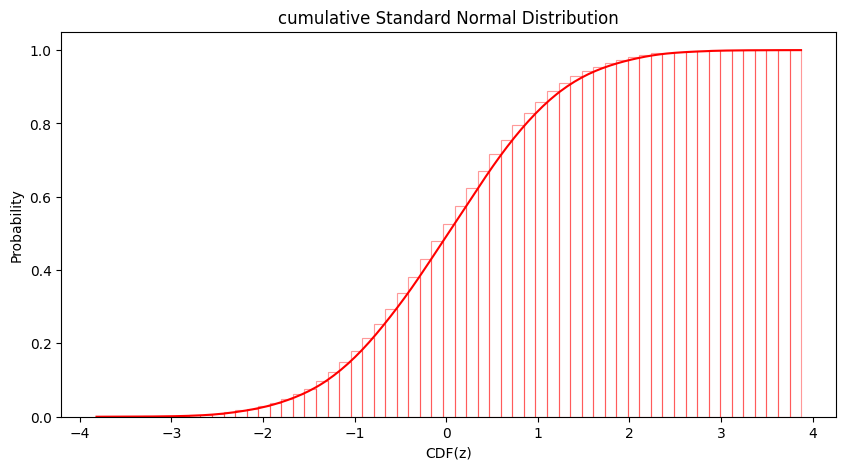

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(normal_data, kde=True, color='red', alpha=0.4, stat='probability', cumulative=True , fill=False)
plt.title('cumulative Standard Normal Distribution')
plt.xlabel('CDF(z)')
plt.show()

### Use Cases

Say we asked 100,000 people how tall they are and then we realized that the people's heights distribute like normal distributions.

 let's answer some questions.

In [ ]:
mean = 174
std = 10
height = stats.norm.rvs(loc=mean, scale=std, size=100_000)
height[0:10]

array([189.0809148 , 179.20288235, 147.80443355, 167.52964517,
       173.06926717, 158.98543365, 163.96046853, 173.51252396,
       163.33100519, 165.74818555])

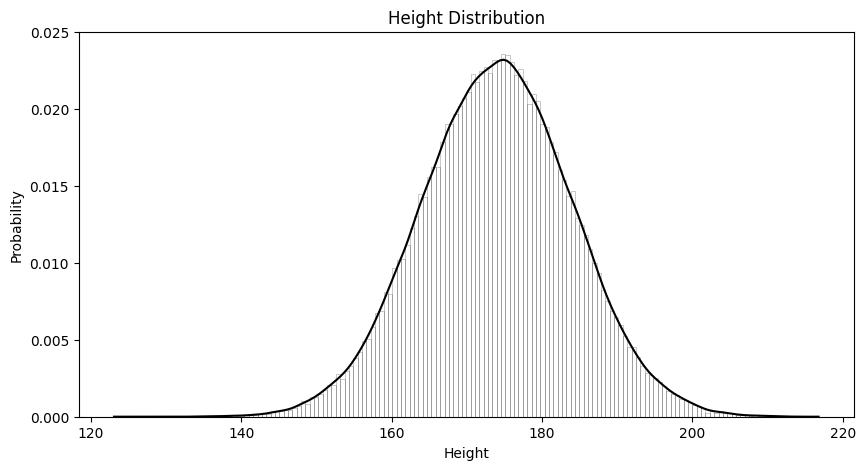

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(height, kde=True, color = 'black', alpha = 0.3, stat='probability', fill=False)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.yticks(np.arange(0, 0.03, 0.005))
plt.show()

**My hight is 185cm, let's see what is the probability of being 185cm in this population**

In [ ]:
my_weight = 185
filtered = [h for h in height if (h>=my_weight) and (h<my_weight+1)]
print(f'The probability of bing 185cm in this population is: {round((len(filtered)/len(height))*100, 2)}%')

The probability of bing 185cm in this population is: 2.15%


And if we compare to ideal normal distribution:

In [ ]:
print(f'185cm in our population is: {round((len(filtered)/len(height))*100, 2)}%, and 185cm in ideal population is: {round(stats.norm.pdf(my_weight, mean, std)*100,2)}%')

185cm in our population is: 2.15%, and 185cm in ideal population is: 2.18%


**I want to know what is the probability of finding a person taller than me.**

In [ ]:
filtered = [h for h in height if h<my_weight+1] # Compute CDF
print(f'The probability of bing taller than 185cm is: {round((1 - len(filtered)/len(height))*100, 2)}%')

The probability of bing taller than 185cm is: 11.37%


And if we compare to ideal normal distribution:

In [ ]:
print(f'Taller than 185cm in our population is: {round((1 - len(filtered)/len(height))*100, 2)}%, in ideal population is: {round((1 - stats.norm.cdf(my_weight, mean, std))*100,2)}%')

Taller than 185cm in our population is: 11.37%, in ideal population is: 13.57%


**What is the probability of finding a person with a height somewhere between 170 cm to 190 cm in both the ideal dataset(dataset with a huge amount of data) and our dataset?**

In [ ]:
filtered = [h for h in height if (h>=170) and (h<=190)]
ideal = stats.norm.cdf(190, mean, std) - stats.norm.cdf(170, mean, std)
print(f'The probability of bing between 170 to 190 in ideal case is: {round(ideal*100, 2)}%, and in our data is: {round((len(filtered)/len(height))*100, 2)}%')

The probability of bing between 170 to 190 in ideal case is: 60.06%, and in our data is: 60.25%


## Beta

In [ ]:
a = 8
b = 2
beta_data = stats.beta.rvs(a, b, size = 10_000)
beta_data[:10]

array([0.86516828, 0.91131671, 0.68235525, 0.72829948, 0.93109294,
       0.81424707, 0.85112856, 0.61369047, 0.92699764, 0.93516854])

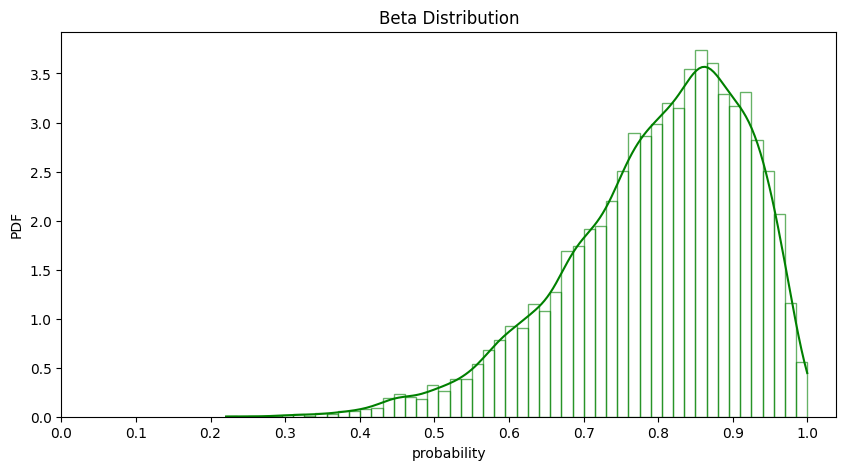

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(beta_data, color='green', alpha=0.6, stat='density', kde=True, fill=False)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title('Beta Distribution')
plt.xlabel('probability')
plt.ylabel('PDF')
plt.show()

### Metrics

**PDF**

In [ ]:
pdf = stats.beta.pdf(0.72, a, b)
round(pdf, 3)

2.022

Let's consider a company that produces 10 products per day, 2 of which are defective and 8 of which are good. We want to see the percentage of 0.72 ratio compared to other percentages.

It's equal to almost 2. This number shows that the ratio for probability=0.72 is relatively high.

**CDF**

In [ ]:
cdf = stats.beta.cdf(0.75, a, b)
round(cdf, 3)

0.3

This shows that the probability that maximum 75% of goods (75 or less) are healthy is equal to 0.3

**MEDIAN**

In [ ]:
median = stats.beta.median(a, b)
round(median, 3)

0.82

**MEAN**

In [ ]:
mean = stats.beta.mean(a, b)
round(mean, 3)

0.8

**VAR**

In [ ]:
var = stats.beta.var(a, b)
round(var, 3)

0.015